<a href="https://colab.research.google.com/github/Sudharshana-HG/DSFEB12/blob/main/MovieRatings-26(sunday).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
#import dataset
movies = pd.read_csv('/content/Movie-Ratings.csv')

In [40]:
movies

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [41]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [42]:
movies.columns=['Film', 'Genre', 'CreticRating', 'Audience Ratings ',
       'Budget', 'Year']

In [43]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Film               559 non-null    object
 1   Genre              559 non-null    object
 2   CreticRating       559 non-null    int64 
 3   Audience Ratings   559 non-null    int64 
 4   Budget             559 non-null    int64 
 5   Year               559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [44]:
movies[movies.Year==2009]

,Film,Genre,CreticRating,Audience Ratings,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
2,12 Rounds,Action,30,52,20,2009
4,17 Again,Comedy,55,70,20,2009
5,2012,Action,39,63,200,2009
13,A Serious Man,Drama,89,64,7,2009
...,...,...,...,...,...,...
542,Whiteout,Action,7,28,35,2009
546,X-Men Origins: Wolverine,Action,37,72,150,2009
548,Year One,Adventure,14,31,60,2009
555,Youth in Revolt,Comedy,68,52,18,2009


In [45]:
movies.Year =movies.Year.astype('category')

In [46]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Film               559 non-null    object  
 1   Genre              559 non-null    object  
 2   CreticRating       559 non-null    int64   
 3   Audience Ratings   559 non-null    int64   
 4   Budget             559 non-null    int64   
 5   Year               559 non-null    category
dtypes: category(1), int64(3), object(2)
memory usage: 22.7+ KB


In [47]:
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

ValueError: ignored

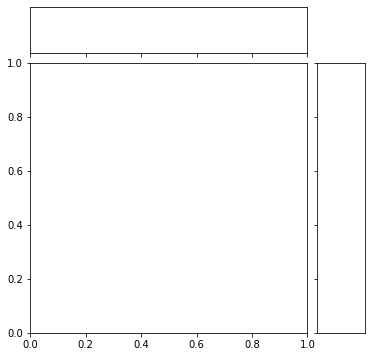

In [57]:
sns.jointplot(data=movies, x='CreticRating',y='Audience Ratings')

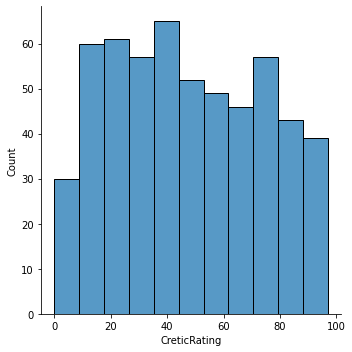

In [53]:
sns.displot(movies.CreticRating)

<AxesSubplot:xlabel='CreticRating', ylabel='Count'>

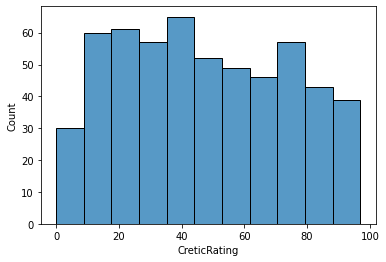

In [56]:
sns.histplot(movies.CreticRating)

(array([134., 183.,  82.,  50.,  33.,  20.,  11.,  20.,   6.,   5.,   9.,
          2.,   3.,   0.,   1.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <BarContainer object of 15 artists>)

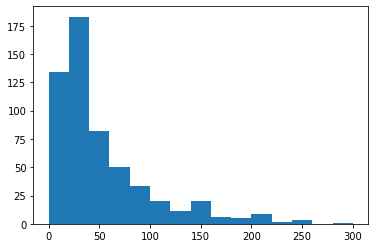

In [58]:
plt.hist(movies.Budget,bins=15)

(array([4., 9., 7., 2., 2., 3., 1., 4., 1., 0., 1., 0., 1., 0., 1.]),
 array([  4.        ,  16.06666667,  28.13333333,  40.2       ,
         52.26666667,  64.33333333,  76.4       ,  88.46666667,
        100.53333333, 112.6       , 124.66666667, 136.73333333,
        148.8       , 160.86666667, 172.93333333, 185.        ]),
 <BarContainer object of 15 artists>)

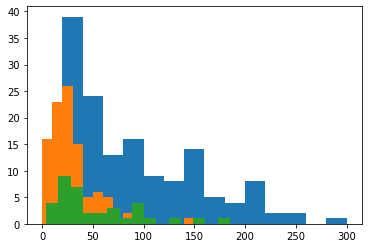

In [64]:
plt.hist(movies[movies.Genre=='Action'].Budget,bins=15)
plt.hist(movies[movies.Genre=='Drama'].Budget,bins=15)
plt.hist(movies[movies.Genre=='Thriller'].Budget,bins=15)


In [65]:
movies.Genre.unique()

array(['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance',
       'Thriller'], dtype=object)

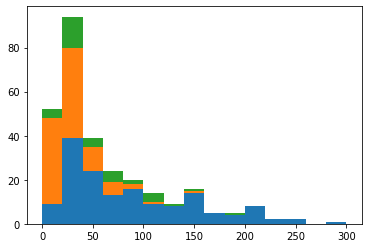

In [70]:
plt.hist([movies[movies.Genre=='Action'].Budget,movies[movies.Genre=='Drama'].Budget,movies[movies.Genre=='Thriller'].Budget],bins=15,stacked=True)
plt.show()


In [72]:
movies.Genre=movies.Genre.astype('category')
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

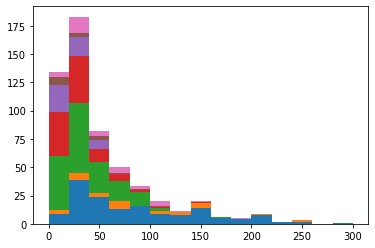

In [78]:
list1=list()
for gen in movies.Genre.cat.categories:
  list1.append(movies[movies.Genre==gen].Budget)


plt.hist(list1,bins=15,stacked=True)
plt.show()

AttributeError: ignored

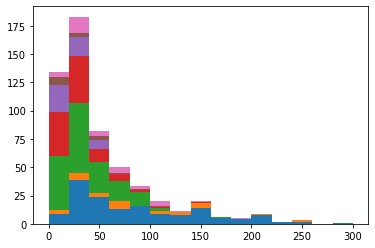

In [80]:
list1=list()
list2=list()
for gen in movies.Genre.cat.categories:
  list1.append(movies[movies.Genre==gen].Budget)
  list2.append(gen)

plt.hist(list1, bins=15, stacked=True, lable=list2)
plt.legend()
plt.show()

In [83]:
sns.kdeplot(movies.CreticRating,movies.Audience Ratings	,cmap='Blues',shade=True)

SyntaxError: ignored

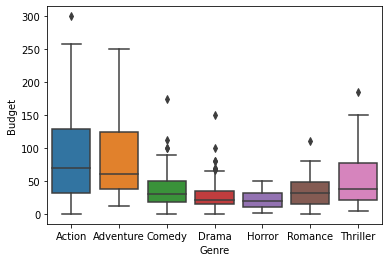

In [87]:
sns.boxplot(data=movies, x='Genre',y='Budget')
plt.show()

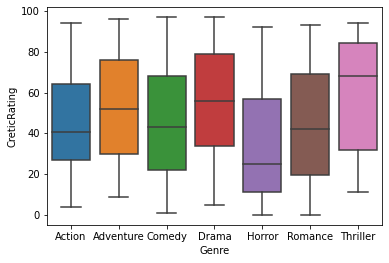

In [86]:
sns.boxplot(data=movies, x='Genre',y='CreticRating')
plt.show()

NameError: ignored

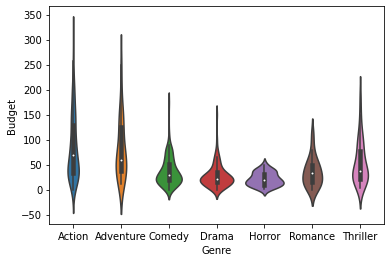

In [95]:
sns.violinplot(data=movies, x='Genre',y='Budget')
plt.show()